In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "..", "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("final-preprocessed-data.csv");

In [5]:
df.shape

(71314, 71)

In [6]:
df.head()

,season,GW,at_home,player_id,team_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,...,threat_pgw,threat_rlf,threat_rsf,total_points_pgw,total_points_rlf,total_points_rsf,yellow_cards_pgw,yellow_cards_rlf,yellow_cards_rsf,total_points
0,2016,1,0,1,20,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,2016,1,1,2,6,17,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
2,2016,1,1,4,1,9,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0
3,2016,1,0,6,18,13,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,2016,1,1,7,4,20,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [7]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
team_id                   int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
assists_rlf               int64
assists_rsf               int64
bonus_pgw               float64
bonus_rlf                 int64
bonus_rsf                 int64
bps_pgw                 float64
bps_rlf                   int64
bps_rsf                   int64
clean_sheets_pgw        float64
clean_sheets_rlf          int64
clean_sheets_rsf          int64
creativity_pgw          float64
creativity_rlf          float64
creativity_rsf          float64
goals_conceded_pgw      float64
goals_conceded_rlf        int64
goals_conceded_rsf        int64
goals_scored_pgw        float64
goals_scored_rlf          int64
                         ...   
own_goal

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,71314.0,2017.076170,0.914703,2016.00000,2016.00,2017.000000,2018.000000,2019.000000
GW,71314.0,19.412570,11.356374,1.00000,9.00,19.000000,29.000000,38.000000
at_home,71314.0,0.499607,0.500003,0.00000,0.00,0.000000,1.000000,1.000000
player_id,71314.0,488.582424,296.885284,1.00000,240.00,478.000000,702.000000,1213.000000
team_id,71314.0,12.161918,7.302421,1.00000,6.00,11.000000,18.000000,29.000000
opponent_id,71314.0,12.050888,7.288860,1.00000,5.00,11.000000,18.000000,29.000000
champion_ls,71314.0,0.050341,0.218649,0.00000,0.00,0.000000,0.000000,1.000000
top5_ls,71314.0,0.250890,0.433529,0.00000,0.00,0.000000,1.000000,1.000000
bottom5_ls,71314.0,0.249222,0.432565,0.00000,0.00,0.000000,0.000000,1.000000
promoted_ts,71314.0,0.149550,0.356632,0.00000,0.00,0.000000,0.000000,1.000000


In [9]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [10]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"];

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, 
                                                    random_state=random_state)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.50, 
                                                    random_state=random_state)

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train);

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
X_val_scaled = scaler.transform(X_val)

In [16]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)

X train shape:  (42788, 68)
y train shape:  (42788, 1)


In [17]:
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X test shape:  (14263, 68)
y test shape:  (14263, 1)


In [18]:
print("X val shape: ", X_val.shape)
print("y val shape: ", y_val.shape)

X val shape:  (14263, 68)
y val shape:  (14263, 1)


In [19]:
def create_mlp(dim, dropout=0.1, l2_reg=0.01, regress=False):
    # define our MLP network
    model = Sequential();
    
#     model.add(Dense(1024, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(512, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(256, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(128, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(64, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(32, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));

#     model.add(Dense(128, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(64, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(32, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(16, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
#     model.add(Dropout(dropout));

    model.add(Dense(8, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(7, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(6, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(5, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(4, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(3, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(2, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
 
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, kernel_regularizer=regularizers.l2(l2_reg), activation="linear"));
 
    # return our model
    return model

In [20]:
model = create_mlp(X_train.shape[1], dropout=0.07, l2_reg=0.07, regress=True)
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt);

W1008 09:32:46.007890 4562126272 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1008 09:32:46.024857 4562126272 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1008 09:32:46.027168 4562126272 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1008 09:32:46.045738 4562126272 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1008 09:32:46.053482 4562126272 deprecati

In [21]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0, mode='auto')

In [22]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=500, shuffle=True, callbacks=[es], verbose=1)

W1008 09:32:46.817975 4562126272 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 42788 samples, validate on 14263 samples
Epoch 1/500
42788/42788 [==============================] - 3s 70us/step - loss: 8.4194 - val_loss: 7.0829
Epoch 2/500
42788/42788 [==============================] - 2s 49us/step - loss: 6.6710 - val_loss: 6.0836
Epoch 3/500
42788/42788 [==============================] - 2s 47us/step - loss: 5.7523 - val_loss: 5.2293
Epoch 4/500
42788/42788 [==============================] - 2s 48us/step - loss: 5.3326 - val_loss: 4.9749
Epoch 5/500
42788/42788 [==============================] - 2s 47us/step - loss: 5.1327 - val_loss: 4.8424
Epoch 6/500
42788/42788 [==============================] - 2s 47us/step - loss: 5.0217 - val_loss: 4.7588
Epoch 7/500
42788/42788 [==============================] - 2s 46us/step - loss: 4.9632 - val_loss: 4.7200
Epoch 8/500
42788/42788 [==============================] - 2s 47us/step - loss: 4.8921 - val_loss: 4.6819
Epoch 9/500
42788/42788 [==============================] - 2s 47us/step - loss: 4.8755 - val_loss: 4.6

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
y_true = np.array(y_test["total_points"]);

In [25]:
y_pred = model.predict(X_test_scaled);

In [26]:
pred_df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})

In [27]:
def getInRange(actual, predicted, lower_bound=0, upper_bound=1):
    return ((actual - predicted) >= lower_bound) and ((actual - predicted) <= upper_bound)

In [28]:
pred_df["in_range"] = pred_df.apply(lambda row: getInRange(row["Actual"], row["Predicted"], 0, 1), axis=1)

In [29]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.10


In [30]:
pred_df.head(25)

,Actual,Predicted,in_range
0,6.0,2.824913,False
1,0.0,0.677825,False
2,0.0,0.555030,False
3,0.0,0.451647,False
4,0.0,0.492953,False
5,0.0,0.463362,False
6,2.0,2.530079,False
7,6.0,2.060636,False
8,0.0,2.562223,False
9,-1.0,0.540119,False


In [31]:
test_df = pred_df.head(25)

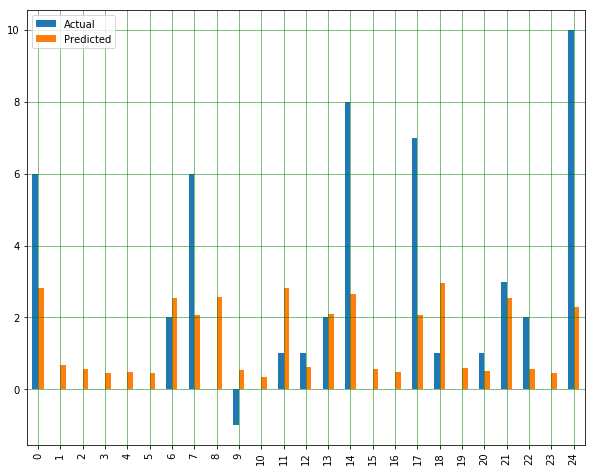

In [32]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

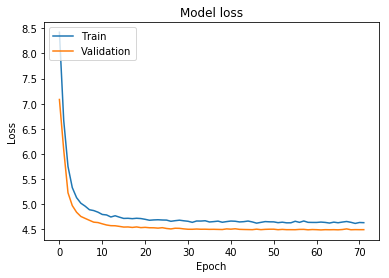

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2546777526422292
R2 score: 0.2524863181736806
Mean Squared Error: 3.81561789074437
Root Mean Squared Error: 1.9533606658127347


In [35]:
player_id_df = pd.read_csv("player_id_map.csv");

In [36]:
team_id_df = pd.read_csv("team_id_map.csv");

In [37]:
# load and the test weekly fpl scrape
gw=8

In [38]:
gw_dir = os.path.join(os.getcwd(),"gw", str(gw))

In [39]:
if not os.path.exists(gw_dir):
    os.makedirs(gw_dir)

In [40]:
os.chdir(gw_dir)

In [51]:
weekly_scrape = pd.read_csv("gw{}-fpl-data.csv".format(gw));

In [52]:
X_test.columns

Index(['at_home', 'player_id', 'team_id', 'opponent_id', 'champion_ls',
       'top5_ls', 'bottom5_ls', 'promoted_ts', 'assists_pgw', 'assists_rlf',
       'assists_rsf', 'bonus_pgw', 'bonus_rlf', 'bonus_rsf', 'bps_pgw',
       'bps_rlf', 'bps_rsf', 'clean_sheets_pgw', 'clean_sheets_rlf',
       'clean_sheets_rsf', 'creativity_pgw', 'creativity_rlf',
       'creativity_rsf', 'goals_conceded_pgw', 'goals_conceded_rlf',
       'goals_conceded_rsf', 'goals_scored_pgw', 'goals_scored_rlf',
       'goals_scored_rsf', 'ict_index_pgw', 'ict_index_rlf', 'ict_index_rsf',
       'influence_pgw', 'influence_rlf', 'influence_rsf', 'minutes_pgw',
       'minutes_rlf', 'minutes_rsf', 'opponent_form', 'own_goals_pgw',
       'own_goals_rlf', 'own_goals_rsf', 'penalties_missed_pgw',
       'penalties_missed_rlf', 'penalties_missed_rsf', 'penalties_saved_pgw',
       'penalties_saved_rlf', 'penalties_saved_rsf', 'player_form',
       'red_cards_pgw', 'red_cards_rlf', 'red_cards_rsf', 'result_pgw',
    

In [53]:
weekly_scrape_scaled = scaler.transform(weekly_scrape[X_test.columns]);

In [54]:
y_pred_weekly = model.predict(weekly_scrape_scaled);

In [55]:
y_pred_weekly_df = pd.DataFrame({'player_id': list(weekly_scrape["player_id"]), 
                                 'position': list(weekly_scrape["position"]),
                                 'predicted': y_pred_weekly.flatten()});


In [56]:
player_names = [];
opponent_names = [];

for index, row in weekly_scrape.iterrows():
    player_id = row["player_id"];
    opponent_id = row["opponent_id"];
    
    player_names.append(player_id_df[player_id_df["player_id"] == player_id]["actual_name"].iloc[0]);
    opponent_names.append(team_id_df[team_id_df["team_id"] == opponent_id]["team_name"].iloc[0]);

In [57]:
y_pred_weekly_df["player_name"] = player_names;
y_pred_weekly_df["opponent"] = opponent_names;

In [58]:
y_pred_weekly_df = y_pred_weekly_df[["player_id", "position", "player_name", "opponent", "predicted"]];

In [59]:
y_pred_weekly_df.sort_values(["predicted"], ascending=False)

,player_id,position,player_name,opponent,predicted
14,858.0,FWD,Pierre-Emerick Aubameyang,Bournemouth,3.028440
10,385.0,MID,Kevin De Bruyne,Wolverhampton Wanderers,2.845033
7,585.0,MID,Sadio Mané,Leicester City,2.817560
2,648.0,DEF,Trent Alexander-Arnold,Leicester City,2.797715
13,1206.0,FWD,Teemu Pukki,Aston Villa,2.749378
12,882.0,FWD,Tammy Abraham,Southampton,2.730245
9,1178.0,MID,Mason Mount,Southampton,2.678117
0,176.0,GK,David de Gea,Newcastle United,2.649595
3,514.0,DEF,Nicolás Otamendi,Wolverhampton Wanderers,2.615496
11,1208.0,MID,Todd Cantwell,Aston Villa,2.522046


In [60]:
y_pred_weekly_df.to_csv("gw{}-predicted-data.csv".format(gw));

In [61]:
min_max_pos = {
    "GK": {
        "min": 1,
        "max": 1
    },
    "DEF": {
        "min": 3,
        "max": 5
    },
    "MID": {
        "min": 2,
        "max": 5
    },
    "FWD": {
        "min": 1,
        "max": 3
    }
}

In [62]:
def best11(df, max_players=11):
    selectedTeam = pd.DataFrame(columns=df.columns);
    positions = list(np.unique(df["position"]));
    
    # base cases - min 1 keeper, 3 def, 2 mids, 1 fwd
    for position in positions:
        df_ = df[df["position"] == position].sort_values(["predicted"], 
                                                         ascending=False).head(min_max_pos[position]["min"]);
        selectedTeam = selectedTeam.append(df_);
        
    gk_ind = positions.index("GK");
    del positions[gk_ind];
    
    num_players = selectedTeam.shape[0];
    
    # recursive case - max 5 def, 5 mids, 3 fwd
    while num_players < max_players:
        num_def = selectedTeam[selectedTeam["position"] == "DEF"].shape[0];
        num_mid = selectedTeam[selectedTeam["position"] == "MID"].shape[0];
        num_fwd = selectedTeam[selectedTeam["position"] == "FWD"].shape[0];
        
        candidates=[]

        for position in positions:
            num_position = selectedTeam[selectedTeam["position"] == position].shape[0];
            
            if (num_position < min_max_pos[position]["max"]):
                df_ = df[df["position"] == position].sort_values(["predicted"], ascending=False).head(selectedTeam[selectedTeam["position"] == position].shape[0] + 1).tail(1)
                candidates.append(df_)
    
        max_score = candidates[0]["predicted"].iloc[0]
        best_player = candidates[0]
        
        for index in range(len(candidates)):
            score = candidates[index]["predicted"].iloc[0]
            if (score > max_score):
                max_score = score
                best_player = candidates[index]
        
        selectedTeam = selectedTeam.append(best_player);
        
        num_players = num_players + 1;
        
    
    best11 = pd.DataFrame(columns=selectedTeam.columns);
    best11 = best11.append(selectedTeam[selectedTeam["position"] == "GK"]);
    best11 = best11.append(selectedTeam[selectedTeam["position"] == "DEF"]);
    best11 = best11.append(selectedTeam[selectedTeam["position"] == "MID"]);
    best11 = best11.append(selectedTeam[selectedTeam["position"] == "FWD"]);
    
    top2_ = list(best11.sort_values(["predicted"], ascending=False).head(2).index);
    best11["roles"] = ""
    best11.at[top2_[0], 'roles']="C"
    best11.at[top2_[1], 'roles']="VC"
    
    best11["predicted"] = best11["predicted"].apply(lambda predicted: round(predicted, 0));
    
    return best11


In [63]:
best11 = best11(y_pred_weekly_df)

In [64]:
best11

,player_id,position,player_name,opponent,predicted,roles
0,176.0,GK,David de Gea,Newcastle United,3.0,
2,648.0,DEF,Trent Alexander-Arnold,Leicester City,3.0,
3,514.0,DEF,Nicolás Otamendi,Wolverhampton Wanderers,3.0,
4,977.0,DEF,Issa Diop,Crystal Palace,2.0,
10,385.0,MID,Kevin De Bruyne,Wolverhampton Wanderers,3.0,VC
7,585.0,MID,Sadio Mané,Leicester City,3.0,
9,1178.0,MID,Mason Mount,Southampton,3.0,
11,1208.0,MID,Todd Cantwell,Aston Villa,3.0,
14,858.0,FWD,Pierre-Emerick Aubameyang,Bournemouth,3.0,C
13,1206.0,FWD,Teemu Pukki,Aston Villa,3.0,


In [65]:
sum(best11["predicted"])

32.0

In [66]:
best11.to_csv("gw{}-best11.csv".format(gw), index=False);